In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from linearRegression.linearRegression import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation


X = np.array([i*np.pi/180 for i in range(60,300,10)])
np.random.seed(10)  #Setting seed for reproducibility
y = 4*X + 7 + np.random.normal(0,3,len(X))

X = pd.DataFrame(X.reshape((len(X),1)))
y = pd.Series(np.array(y))
N = 300
P = 1
# np.random
# X = pd.DataFrame(np.random.randn(N, P))
# y = pd.Series(np.random.randn(N))

LR = LinearRegression(fit_intercept=True)
LR.fit_non_vectorised(X, y, 24, n_iter=100) # here you can use fit_non_vectorised / fit_autograd methods
past_thetas = LR.alltheta
past_costs = LR.allerror




fig = plt.figure()
ax = plt.axes()
plt.title('Y vs X')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X, y, color='orange')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()


def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation



In [7]:

import io
import base64 
from IPython.display import HTML
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=60, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 15)
# plt.show()
HTML(anim.to_jshtml())

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.



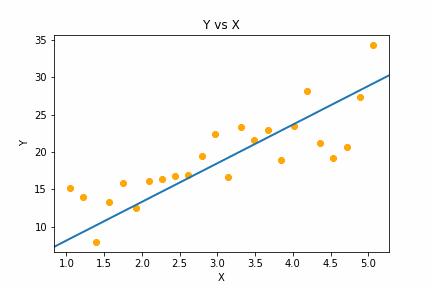

In [4]:
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))